# Sentiment Analysis

Broadly speaking, Sentiment Analysis is the task of identifying and extracting subjective information from a source material - in our case, our source material will exclusively be text. 

Defined as such, Sentiment Analysis is a *huge* subfield of text mining. It's hard to overstate how many routes you may take when the overarching goal is the identification of subjectivity. In today's lecture, we're only going to learn how to implement the most basic sentiment analysis approaches. If your final project merits a more sophisticated approach, then be sure to do your own reading and to consult with me when necessary. There's a reason why the final project is the only major graded component of the class.

All of you interested in Sentiment Analysis must be made aware (if you don't already know) that *the* canonical reference text, published in 2008 but still used today, is [the monograph *Opinion Mining and Sentiment Analysis* by Bo Pang and Lillian Lee](http://www.cs.cornell.edu/home/llee/omsa/omsa.pdf). One reason why it has retained its salience (and gleaned over 5000 citations) is that it is primarily a treatise on the the *problem* of sentiment analysis, rather than a demonstration of a particular machine learning technique. As such, it remains relevant today. Much of today's talk and demos will be based, directly or indirectly, on Pang's article. That being said, **if you're considering working with sentiment for your final project, you should probably read the Pang monograph**. 

## Polarity Classification

This is probably the first thing you think of when you hear the phrase "sentiment analysis", and this is the topic we'll be covering in today's lecture. Polarity classification is sentiment analysis in its most simple form. Is a sentence positive or negative? Assign a value of 1 if positive, or 0 if negative. Thumbs up or thumb down, good or bad, happy or sad. You have two mutually exclusively and oppositional *polarities* and you're assuming that a given text belongs to one or the other. 

You are an excellent polarity classifier. Assign the label "positive" or "negative" to the following sentences. 

* This movie was terrific! 
* This movie totally sucked!

Trivially easy. But how do we train a computer to do the same thing? Morever, how do we train it to identify patterns in text such that it can continue to classify new, unseen, incoming texts as positive or negative?

Let's think for a moment how you were able to quickly classify the above two example sentences. They're both sentences with 4 words, but the dead giveaway were the last words in each sentences. Those words were *adjectives* and they had a *clear polarity*. Terrific is a positive word, sucked is a negative word. 

Having observed this, we have a simple - but potentially effective - way to classify texts. Look in the texts, and see if they have positive or negative adjectives. Let's try this on some data. We'll analyze the most recent 2500 Tweets from both the Clinton and Trump accounts. I know you're probably getting tired of these accounts, but as I tried to come up with a different dataset, I realized that you really can't top the election when it comes to finding highly emotional and polarized tweets. 

I've already shown how to pull Tweets using the Tweepy API, so I've already downloaded the Tweets and saved them into a csv file using Pandas. Here, I'm loading it back into the Python environment. The csv file will be available on canvas. 

In [1]:
import pandas as pd

df = pd.read_csv("sentimentanalysis.csv", index_col=0, encoding="latin1")

In [2]:
df.head()

,user,text,source,fav,rt
0,realDonaldTrump,"Remember, don't believe ""sources said"" by the ...",Twitter for Android,8572,3616
1,realDonaldTrump,Did Crooked Hillary help disgusting (check out...,Twitter for Android,12930,5628
2,realDonaldTrump,Using Alicia M in the debate as a paragon of v...,Twitter for Android,12738,5209
3,realDonaldTrump,"Wow, Crooked Hillary was duped and used by my ...",Twitter for Android,13210,5205
4,realDonaldTrump,Anytime you see a story about me or my campaig...,Twitter for Android,21316,9147


Alright, let's go ahead and iterate through all the tweet texts and mark each tweet that contains the word "good" as 1 and each tweet that contains the word "bad" as -1. We'll leave a neutral category, 0, for the likely possibility that a tweet does not contain either word. This will be our first, brute-force sentiment analysis. 

Note that in its current format, the Tweet text is a string:

In [3]:
df['text'].iloc[0]

'Remember, don\'t believe "sources said" by the VERY dishonest media. If they don\'t name the sources, the sources don\'t exist.'

So as we iterate through the tweets, we need some solid method for splitting each tweet into a list of words; a process known as tokenization. 

We'll use the Natural Language Toolkit, or ``nltk``. It has a word tokenizer. 

If this is your first time using NLTK, you may have to use the command line to install some peripherals. This is covered in the lecture video. 

In [4]:
from nltk import word_tokenize

print(word_tokenize("This sentence is a string, but after it's passed through word_tokenize, it becomes a list of words."))

['This', 'sentence', 'is', 'a', 'string', ',', 'but', 'after', 'it', "'s", 'passed', 'through', 'word_tokenize', ',', 'it', 'becomes', 'a', 'list', 'of', 'words', '.']


So, we'll iterate through all the sentences, see if a positive or negative word is in it, and assign it a label.

In [5]:
sentiment_labels = []

for text in df['text']:
    tokenized_text = word_tokenize(text)
    if "good" in tokenized_text:
        sentiment_labels.append(1) # This is a positive tweet; append 1
    elif "bad" in tokenized_text:
        sentiment_labels.append(-1) # This is a negative tweet; append -1
    else:
        sentiment_labels.append(0) # This tweet has no identifiable sentiment (by our current, simple model)

In [6]:
# Add the newly-created sentiment labels to the data frame as a new column
df['sentiment'] = sentiment_labels

Let's investigate our results. First, how many good, bad, and neutral tweets did we find for Clinton and Trump?

In [7]:
df.groupby(["user", "sentiment"])["user"].agg("count")

user             sentiment
HillaryClinton   -1              7
                  0           2446
                  1             47
realDonaldTrump  -1             64
                  0           2393
                  1             43
Name: user, dtype: int64

7 negative and 47 positive Tweets for Clinton, 2446 unclassified. 64 negative and 43 positive for Trump, 2393 unclassified. For obvious reasons, we didn't capture very much sentiment - we're only using one positive and one negative word as our distinguisher so our model is low powered. 

Now, let's take a look at what positive and negative Tweets we found for the candidates.  

In [8]:
c_neg = df[(df['user']=="HillaryClinton") & (df['sentiment']==-1)]
print("Clinton, Negative")
for t in c_neg['text'][:5]:
    print(t)
    print("*"*50)


Clinton, Negative
"Donald Trump doesn't see people like me, he only sees disability. I honestly feel bad for someone with so much hat https://t.co/NTeF9u8JpN
**************************************************
RT @RevDrBarber: Not only is @realDonaldTrump wrong on birtherism, his words and policies are bad for Americans alive now and our children
**************************************************
3. While refusing to release your tax returns, how will you confirm that you do not have dangerous financial ties to bad actors abroad?
**************************************************
A wall that Mexico will pay for: a bad idea from an even worse negotiator. https://t.co/RZfOKe45RO
**************************************************
Donald Trump's economic plan is a bad deal for working familiesand a big tax cut for Donald Trump.
https://t.co/D0oOe6bwza
**************************************************


Keeping in mind that we have an extremely simple and blunt model, it looks like the tweets from Clinton that we marked as negative are, in fact, negative. 

In [9]:
t_neg = df[(df['user']=="realDonaldTrump") & (df['sentiment']==-1)]
print("Trump, Negative")
for t in t_neg['text'][:5]:
    print(t)
    print("*"*50)


Trump, Negative
.@HillaryClinton channels John Kerry on trade: she was for bad trade deals before she was against them. #TPP #Debates2016
**************************************************
Crooked Hillary's bad judgement forced her to announce that she would go to Charlotte on Saturday to grandstand. Dem pols said no way, dumb!
**************************************************
President Obama &amp; Putin fail to reach deal on Syria - so what else is new? Obama is not a natural deal maker. Only makes bad deals!
**************************************************
Now that African-Americans are seeing what a bad job Hillary type policy and management has done to the inner-cities, they want TRUMP!
**************************************************
Crooked Hillary's brainpower is highly overrated.Probably why her decision making is so bad or, as stated by Bernie S, she has BAD JUDGEMENT
**************************************************


We've correctly labeled some negative Trump tweets as well.

Now on to the positive. 

In [10]:
c_pos = df[(df['user']=="HillaryClinton") & (df['sentiment']==1)]
print("Clinton, Positive")
for t in c_pos['text'][:5]:
    print(t)
    print("*"*50)

Clinton, Positive
When you have a really, really good night. #SheWon https://t.co/FVeGqhYxRZ
**************************************************
"Anyone who complains about microphone problems is not having a good night." Hillary #SheWon
**************************************************
"Maybe he didn't do a good job." Donald Trump

Looks like you loved it at the time. #DebateNight https://t.co/LelC6Tb3nj
**************************************************
Donald Trump is really good at spending other people's moneyon:

Legal settlements.
Payoffs.
Portraits of himself. https://t.co/C5bXw5brI9
**************************************************
"You want to give me a good send-off? Go vote. Barack Obama: https://t.co/tTgeqxNqYm https://t.co/Jqf2jmx3D0
**************************************************


Now, some of the difficulties of sentiment analysis appears. 

How would you evaluate the sentiment of the 3rd tweet? 

"Maybe he didn't do a good job." has the word "good" in it. But it's a *negated* sentence. Someone *didn't* do a good job. 

Furthermore, this is a *quote* inside of the Tweet. Even a human would have a hard time labeling this one as positive or negative. 

Look at the 4th tweet: Clinton says Donald Trump is good at something - but she's being sarcastic.

Let's look at Trump's "positive" tweets. 

In [11]:
t_pos = df[(df['user']=="realDonaldTrump") & (df['sentiment']==1)]
print("Trump, Positive")
for t in t_pos['text'][:5]:
    print(t)
    print("*"*50)

Trump, Positive
Heading to Colorado for a big rally. Massive crowd, great people! Will be there soon - the polls are looking good.
**************************************************
Poll numbers are starting to look very good. Leading in Florida @CNN Arizona and big jump in Utah. All numbers rising, national way up. Wow!
**************************************************
"@Brainykid2010: @shl @realDonaldTrump The ad was actually very good!"
**************************************************
You have no idea what my strategy on ISIS is, and neither does ISIS (a good thing). Please get your facts straight - thanks. @megynkelly
**************************************************
Funny, if you listen to @FoxNews, the Democrats did not have a good day. If you listen to the other two, they are fawning. What a difference
**************************************************


Again, some complications arise. We once again see a negation in the last tweet: "Democrats did not have a good day." The fourth Tweet is very ambiguous. Is it good or bad? 

## Knowledge-Based Sentiment Analysis

The form of sentiment analysis we just conducted is known as a **knowledge-based** analysis. Why? Because we referred to a human-made, pre-existing knowledge base to make our sentiment classification decisions. Namely, a two-item knowledge base: "good" indicates a positive tweet, "bad" indicates a negative tweet. 

We need to improve our classification scheme to account for some of the subtleties of human language. When it comes to using a knowledge-based technique, one way to improve things is to have a better knowledge base. Right now we're using only two words. How can we make this situation better?

Well, one simple and obvious idea is to have *more indicator words*. We can make a *pool* of words that indicate positivity, and another pool of words indicating negativity.

Another thing we can do is introduce a sort of score, rather than working in binary. Obviously, the word "awful" is stronger than the word "bad." Maybe we can assign "awful" a value of -2 and bad a value of -1. 

In this manner, with a dictionary of positive words *and* their weights, and negative words *and* their weights, we can assign a *total score* to each Tweet by counting all of the positive negative words, finding their weights, and simply adding them together. 

The *biggest problem* with knowledge bases is that they must be manually created. You have to manually create a set of positive and negative words, and assign weights to them. This is tedious, and time consuming. 

Fortunately for us: several researchers have taken up this tedious work and have made lists of positive and negative words *and* assigned them weights. There are several to chose from, but in today's lecture we'll talk about using the [AFINN dataset by Finn Årup Nielsen](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010).

Here are some random words from the AFINN dataset:

* abandon -2
* affection 3
* anxious -2
* applauded 2
* best 3

And so on. There are 2477 words and phrases annotated as such. To obtain a polarity score for a given text, simply identify all words in the text that are in AFINN, and add up their corresponding weight. If it's above 0, it's mostly positive, if it's below, it's mostly negative. Still a simple approach, similar to what we did above, but now we can use 2477 words with different weights rather than 2 words with 2 weights. How much improvement do we gain with this wider knowledge base?

Luckly for us, there is an existing Python module that will execute the above steps for us. It's called ``afinn``. It doesn't come with Anaconda, so we'll have to install it. In your command line or terminal environment, type:

```
pip install afinn

```

To get it installed. Once you've done that, you have to import the factory method, like so:

In [12]:
from afinn import Afinn

Next, you have to use the factory method to make an instance of an afinn object. 

In [13]:
afinn = Afinn()

Now that we have the ``afinn`` object, we simply call its method score and pass it a string of text. We don't even have to tokenize the text using NLTK, ``afinn`` do it for us. 

In [14]:
afinn.score("What a wonderful day! The sun is shining and the birds are singing. I feel great.")

7.0

In [15]:
afinn.score("What a dreary and depressing day. It's raining and I don't even own an umbrella.")

-4.0

Now let's create an empty list called pscore (for "polarity score"). Then, let's iterate through all the Tweet texts and append its corresponding AFINN score to the pscore list. 

In [16]:
pscore = []

for text in df['text']:
    pscore.append(afinn.score(text))
    
pscore[:5]

[-2.0, -1.0, -5.0, -6.0, -1.0]

Now, let's add the pscores as a column to our Data Frame.

In [17]:
df['pscore'] = pscore
df.head()

,user,text,source,fav,rt,sentiment,pscore
0,realDonaldTrump,"Remember, don't believe ""sources said"" by the ...",Twitter for Android,8572,3616,0,-2.0
1,realDonaldTrump,Did Crooked Hillary help disgusting (check out...,Twitter for Android,12930,5628,0,-1.0
2,realDonaldTrump,Using Alicia M in the debate as a paragon of v...,Twitter for Android,12738,5209,0,-5.0
3,realDonaldTrump,"Wow, Crooked Hillary was duped and used by my ...",Twitter for Android,13210,5205,0,-6.0
4,realDonaldTrump,Anytime you see a story about me or my campaig...,Twitter for Android,21316,9147,0,-1.0


We have essentially "created" a new feature that didn't exist before - the polarity score.

Let's investigate how well this method actually works. First, I'm going to split the data frame into two subsets, one containing a single candidate's tweets.

In [18]:
clinton = df[df['user'] == "HillaryClinton"]
trump = df[df['user'] == "realDonaldTrump"]

Let's look at the Clinton and Trump tweets with the highest negative polarity. I'm going to use a method called ``sort_values``. It takes a named argument called ``by`` which indicates which column you want to sort by. Sorting, in this case, means going from lowest to highest, so once we've done this the top five rows will be the **most negative** (have the lowest values).

In [19]:
print("TRUMP, LOWEST POLARITY")
print("-"*50)
trump = trump.sort_values(by='pscore')
for index, row in trump.head().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

TRUMP, LOWEST POLARITY
--------------------------------------------------
('Crooked Hillary Clinton is "guilty as hell" but the system is totally rigged and corrupt! Where are the 33,000 missing e-mails?', -13.0)
**************************************************
('My heart &amp; prayers go out to all of the victims of the terrible #Brussels tragedy. This madness must be stopped, and I will stop it.', -13.0)
**************************************************
('Crooked Hillary Clinton is a fraud who has put the public and country at risk by her illegal and very stupid use of e-mails. Many missing!', -13.0)
**************************************************
('My lawyers want to sue the failing @nytimes so badly for irresponsible intent. I said no (for now), but they are watching. Really disgusting', -12.0)
**************************************************
('Hillary Clinton is unfit to be president. She has bad judgement, poor leadership skills and a very bad and destructive track record

In [20]:
print("CLINTON, LOWEST POLARITY")
print("-"*50)
clinton = clinton.sort_values(by='pscore')
for index, row in clinton.head().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

CLINTON, LOWEST POLARITY
--------------------------------------------------
('It\x92s wrong to tear each other down.\nIt\x92s wrong to let income inequality get worse.\nIt\x92s wrong to put a loose cannon in charge.', -12.0)
**************************************************
("Gun violence and hate aren't isolated\x97homophobia in Orlando, racism in Charleston. We need to fight them together. https://t.co/HcBJzknBz7", -12.0)
**************************************************
('There is something wrong with our country. There is too much violence...too much senseless killing, too many people dead who shouldn\x92t be.', -11.0)
**************************************************
('We owe families of gun violence victims more than prayers.\n\nTell your senators to act on gun violence prevention: https://t.co/v0defjTptE', -11.0)
**************************************************
('RT @repjohnlewis: .@SpeakerRyan, we will not leave without acting for the victims &amp; families of reckless gun

For a very blunt and unsophisticated way to score polarity, this appears to have work quite well. The lowest-scoring tweets for both candidates do, in fact, seem to have very negative sentiment. 

How about the positive? Above, I used a method on the data frame called ``.head()`` to print out the first five rows of the sorted data frame. Incidentally, there is a method called ``.tail()`` that prints out the last five rows. Since the data frame is sorted, the last five rows will have the highest polarity scores, e.g. be the most positive.

In [21]:
print("TRUMP, HIGHEST POLARITY")
print("-"*50)
trump = trump.sort_values(by='pscore')
for index, row in trump.tail().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

TRUMP, HIGHEST POLARITY
--------------------------------------------------
('People (pundits) gave me no chance in South Carolina. Now it looks like a possible win. I would be happy with a one vote victory! (HOPE)', 15.0)
**************************************************
('As expected, the media is very much against me. Their dishonesty is amazing but, just like our big wins in the primaries, we will win!', 15.0)
**************************************************
('"@PaulaDuvall2: We\'re all enjoying you, as well, Mr. T.! You\'ve inspired Hope and a Positive Spirit throughout America! God bless you!" Nice', 15.0)
**************************************************
('Fun to watch the Democrats working so hard to win the great State of South Carolina when I just won the Republican version - amazing people!', 17.0)
**************************************************
('Great honor to be endorsed by popular &amp; successful @gov_gilmore of VA. A state that I very much want to win-THX Jim! ht

In [22]:
print("CLINTON, HIGHEST POLARITY")
print("-"*50)
clinton = clinton.sort_values(by='pscore')
for index, row in clinton.tail().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

CLINTON, HIGHEST POLARITY
--------------------------------------------------
('\x93I married my best friend. I was still in awe of\x85how smart and strong and loving and caring she was.\x94 \x97@BillClinton on Hillary', 11.0)
**************************************************
("Our first-ever gold medal-winning women's gymnastics team: the Magnificent Seven. https://t.co/MVkhHBh7hI", 12.0)
**************************************************
("Happy Fourth of July! Today let's celebrate the best of America\x97our freedom, diversity, and the values we share. -H https://t.co/C6Mdt4iVg5", 12.0)
**************************************************
('The people taking care of our children and our parents deserve a good wage, good benefits, and a secure retirement.', 12.0)
**************************************************
("RT @clairecmc: He's humble.He's incredibly smart.He's a joyful warrior,a kind &amp; thoughtful person.He'll be a wonderful VP! Congrats to my f\x85", 15.0)
*****************

Again, not bad. The "most positive" tweets as identified by ``afinn`` do, in fact, seem quite positive. 

Now that we have this new feature, it might be a good idea to see how they're distributed. I'm using a boxplot visualization to show the ``pscore`` for the tweets; one boxplot per candidate. 

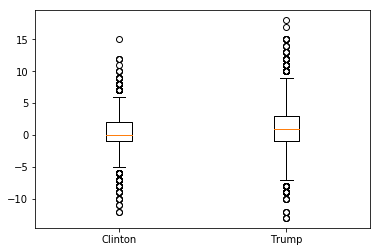

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot([clinton['pscore'], trump['pscore']], labels=["Clinton", "Trump"])
plt.show()

We can see that in aggregate, both candidates have an average around 0, but that Trump's distribution has a wider spread. In other words, when Trump writes a positive tweet, it tends to be very positive, and when he rights a negative one, it tends to be more negative, while Clinton's tweets are more reserved when it comes to both positive and negative sentiment.

To repeat, what we've done above are knowledge-based sentiment analysis; we rely on an external knowledge base to help us determine the sentiment of Tweets. The quality of our sentiment judgements, of course, is reliant on the quality of our knowledge base. Here, we used AFINN, but there are a lot of options out there. 

* AFINN (which we just used)
* [General Inquirer](http://www.wjh.harvard.edu/~inquirer/)
* [Liu Bing's Sentiment Lexicons](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html)
* [Sentiwordnet](http://sentiwordnet.isti.cnr.it/), which is actually included in NLTK

## Making your own sentiment vocabulary using seeds

You might be working with Tweets from a very specialized domain; the example we're using right now is a good illustration. These are political tweets, so words that indicate "positive" and "negative" sentiment in the political realm may not be the same as words that are positive or negative *generally*. 

It's possible if you're working in a specific domain like politics or product reviews, someone out there has already made a sentiment lexicon calibrated to your specific domain. If that's the case, you're in luck. More like than not, however, you won't find a pre-made lexicon. 

You'll therefore have to *make* a lexicon. You *could* do this manually, but that would demand a huge amount of energy, time, and human resources. Probably not feasible for the duration of this course. There is, however, one way to make a sentiment lexicon manually. This process was first introduced by [Turney in a 2002 paper](http://www.aclweb.org/anthology/P02-1053.pdf) and involves starting with a small set of *seed words* that are positive or negative, and then *finding words that are strongly associated with those seed words*. Simply stated, if a word consistently appears with the word *bad*, then it, too, must carry some sort of negative sentiment. We *propogate* the negativity or positivity from the seed words to other words in the dataset. 

I'll demonstrate this approach here, but with the **strong caveat** that since this is a relatively small dataset, it probably won't work well. If you decide to take this route, I strongly advise you collect far more data than 5000 Tweets.

### Pointwise Mutual Information

Pointwise Mutual Information, or PMI, is a measurement of how strongly associated two words are given a corpus and a unit of analysis. It is given by the following formula:

$$
\text{PMI}(a, b) = \text{log}\frac{P(a, b)}{P(a) \cdot P(b)}
$$

Where $P(a, b)$ is the probability that both a and b appear in the same unit of analysis (like a sentence, tweet, or document), while $P(a)$ is the probability that a appears in a unit and $P(b)$ is the probability that b appears in a unit. 

The intuition behind this formula is that if two words appear together more often than we would expect them to appear by chance, then they are strongly associated. The numerator represents how likely they are to appear together, the denominator represents how often we expect them appear together by chance. 

If we take Tweets to be our unit of analysis:

* $P(a, b)$ is simply the number of Tweets that a and b appear together divided by the total number of tweets
* $P(a)$ is the number of Tweets that a appears in, divided by the total number of tweets
* $P(b)$ is the number of Tweets that b appears in, divided by the total number of tweets

### Semantic Orientation of a Word

We start with a set of positive and negative seed words. We'll call the positive seed words $V^{+}$ and the negative seed words $V^{-}$. Let's go ahead and make these sets. 

$$
V^{+} = \{\text{good}, \text{great}, \text{better}\} \\
V^{-} = \{\text{bad}, \text{terrible}, \text{worse}\}
$$

The semantic orientation of a word is simply the sum of its PMIs with the positive seed words, minus the sum of its PMIs with negative seed words. 

$$
\text{SO}(w) = \sum_{v^{+} \in V^{+}} \text{PMI}(w, v^{+}) - \sum_{v^{-} \in V^{-}} \text{PMI}(w, v^{-})
$$

Once you have the semantic orientation for all the words in your corpus, you have something similar to the AFINN lexicon - each word has a positive or negative word associated it. From there, you can iterate through all your tweets. 

The step-by-step process of getting from a corpus and seed words to a list of words with semantic orientations is pretty complex, so I've written a function here that will do the work for you. You can copy and paste this code into your own if you wish to take this approach. 

The function ``getso`` takes four arguments:

* ``seed_pos``: a list containing the positive seed words
* ``seed_neg``: a list containing the negative seed words
* ``texts``: an iterable containing the raw texts
* ``min_df``: an integer, meaning "minimum document frequency". This tells the function to ignore all words that appear less than ``min_df`` times in the corpus. This will remove outliers that appear infrequently and therefore are noise.

The function returns a dictionary. The keys of the dictionary are words, their corresponding values are the SO calculated for that word.

In [24]:
def getso(seed_pos, seed_neg, texts, min_df):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import binarize
    import numpy as np
    n = len(texts)
    cv = CountVectorizer(min_df=min_df)
    vector = cv.fit_transform(texts)
    rvocab = {v: k for k, v in cv.vocabulary_.items()}
    bvector = binarize(vector)
    docfreq = np.sum(bvector.toarray(), axis=0)
    docfreq = docfreq/n
    docfreq = docfreq.reshape(docfreq.shape[0], 1)
    com = vector.T.dot(vector).toarray()
    np.fill_diagonal(com, 0)
    com = com/n
    p_single = docfreq.dot(docfreq.T)
    pmi = np.divide(com, p_single)
    sos = {}
    for word, index in cv.vocabulary_.items():
        so = 0
        for pos in seed_pos:
            p_index = cv.vocabulary_[pos]
            so += pmi[index, p_index]
        for neg in seed_neg:
            n_index = cv.vocabulary_[neg]
            so -= pmi[index, n_index]
        sos[word] = so
    return sos  

Let's take the seed words and the tweet texts and feed them to this new function. This will result in a dictionary of semantic orientations. 

In [25]:
seed_pos = ["good", "great", "better"]
seed_neg = ["bad", "terrible", "worse"]
texts = df['text']
so = getso(seed_pos, seed_neg, texts, min_df=10)

What's the semantic orientation of the words "hillary", "trump", "economy" and "terrorist"?

In [26]:
print(so['hillary'])
print(so['trump'])
print(so['economy'])
print(so['terrorist'])

-2.74509595015
0.309027941379
-4.85461285009
-13.9458884329


"hillary" and "economy" have slightly negative orientations, "trump" has a slightly positive one, while "terrorist" has a very negative one.

Already this should set off some alarm bells as to whether or not we have obtained some effective semantic orientations. We've gotten equal numbers of tweets from both candidates, but our semantic orientations seem slightly biased towards Trump. There are a number of potential reasons for this (included the small amount of data we are using), but one of them might be a tendency for the Trump twitter account to use more adjectives like the seed words we have chosen; therefore, the Trump account influences the semantic orientation outcome slightly more. 

Here's a look at the most positive and negative words, by semantic orientation:

In [27]:
list(sorted(so.items(), key=lambda x:x[1], reverse=True))[:50]

[('barriers', 23.076923076923077),
 ('david', 19.230769230769234),
 ('benefits', 18.641671466722524),
 ('politics', 17.618200783461127),
 ('paying', 16.132720495758157),
 ('facing', 15.384615384615387),
 ('ourselves', 13.986013986013987),
 ('wages', 13.784887678692993),
 ('do', 13.613680347275036),
 ('deserve', 13.206262763784888),
 ('than', 13.03075976803669),
 ('biggest', 13.008824149662459),
 ('evening', 12.798415311792549),
 ('press', 12.69122590382109),
 ('michael', 12.582938164333511),
 ('stay', 12.302350342782848),
 ('looking', 12.254336360805459),
 ('courage', 12.117086453369641),
 ('grow', 12.117086453369641),
 ('tuesday', 11.608402707999575),
 ('rnc', 11.568276684555755),
 ('face', 11.538461538461538),
 ('hate', 11.406153410681092),
 ('spending', 11.25049678976292),
 ('afternoon', 11.223922008033966),
 ('higher', 11.117736699132049),
 ('job', 11.068784712254704),
 ('children', 11.067585144041205),
 ('since', 10.82497763083839),
 ('polls', 10.6869941500645),
 ('100', 10.210465

In [28]:
list(sorted(so.items(), key=lambda x:x[1]))[:25]

[('judgement', -65.36172161172162),
 ('tpp', -46.914623837700759),
 ('getting', -46.800473041297629),
 ('growth', -46.27529554855137),
 ('reporting', -41.666666666666671),
 ('dead', -40.700404743338552),
 ('china', -38.224318747574571),
 ('nafta', -35.880729209524304),
 ('crime', -35.305535201347098),
 ('victims', -34.722222222222221),
 ('attacks', -32.738095238095241),
 ('san', -32.274895646988675),
 ('voted', -31.918579208402218),
 ('wrote', -30.885780885780882),
 ('zero', -29.737379197144584),
 ('possible', -28.733839987992816),
 ('mess', -28.694756570862765),
 ('which', -27.485816210669576),
 ('held', -26.327838827838832),
 ('divided', -26.069726733443552),
 ('anti', -25.635794913640694),
 ('crazy', -25.248835158010753),
 ('course', -23.708010335917315),
 ('income', -22.727272727272727),
 ('call', -22.588522588522586)]

Some the negative words do seem to be appropriately marked (dead, crime, victims, attacks, mess), but others seem to again be indicative of a bias towards Trump (due to negative marks for words like "TPP" and "China"). The words classified as highly positive aren't exactly of high quality. Words like barrier, facing, and David are scored as being highly positive.

There are a few of reasons for this unimpressive result:

* As I mentioned, for the task of automatic lexicon generation, this is a pretty small dataset. There really isn't enough text here to demonstrate that two given words have a strong relationship. If you use this approach, try to have more than 5000 texts available to you.
* The quality of automatic lexicon generation depends very much on the words you choose as positive and negative seeds. I just "guessed" words such as "good", "great", and "better" to be positive words, but it would probably be better for you to do a systematic exploration of your data to find some good seed words. Choosing *more* seed words would also help.

Assuming you do get a decent lexicon from this automatic process, you can then take a route similar with AFINN; go through each tweet, add up the SO scores for each word in the tweet, and you have one number representing the polarity of the tweet.

# Supervised vs. Unsupervised

Notice that our attempts to identify the sentiment polarity of Tweets has been, up to this point, **entirely unsupervised**. We have had to rely on some sort of *external knowledge base* like AFINN to assign some sort of quantitative measure of polarity. What we have *not* done is take a set of labeled examples, train a classifier on it, and run some evaluations on it. 

Why?

The key problem is *labeled data*. In order to get a bunch of tweets and used supervised learning to classify their sentiment, we need some *labeled data* to train the classifier. But for the task at hand, we don't have any labeled data. 

Previously, we have used supervised learning methods to predict the species of an Iris, or to predict whether or not a Tweet came from iPhone or Android. In all those scenarios, the labels were provided for us, either automatically (in the case of Twitter, which provides tweet source as a property), or manually (some 19th century botanist both measured the Irises and determined their species). 

But we don't have that luxury here. We don't have any means to know beforehand whether a Tweet is positive or negative - that's why we're trying to figure out the sentiment in the first place. Lacking a labeled dataset, we have to resort to these rather imprecise unsupervised methods to determine polarity. Since it's unsupervised, it suffers one of the characteristic drawbacks of all unsupervised learning: there's no systematic way to evaluate it. 

## How to get to supervised learning?

Since we're not attempting to predict a feature that is *automatically* provided to us by the Twitter environment, we'll have to find a way to get labeled data if we want to use some form of supervised learning.

### Manually Labeling a set of Tweets

This involves subsetting your tweets and manually identifying them as positive or negative. This is extremely difficult and tedious work, but someone eventually has to do it. It is best practice to have multiple people annotate tweets and then compare the results. The degree to which the results of different coders match is called "Inter-rate Reliability", and usually only manual annotations with high IRR are considered acceptable for publication. Another route to take is to hire a service such as Amazon Mechanical Turk to annotate the tweets, "crowdsourcing" the work. If you have enough Turkers do the work, then you can measure the IRR among them.

### Using an existing dataset

If you're lucky, someone has already labeled a dataset relevant to your research interest. Assuming they have provided many samples with high-quality annotations, you can simply train a classifier on their data, and then use that classifier to classify your data.

### Find something in your data to serve as a proxy for sentiment

If neither of the above two options are available to you, one alternative is to find some indicator in the data you *do* have to serve as an unambiguous proxy for positive or negative sentiment. For example, you could operate with the assumption that every tweet that contains a smiling emoticon, ":)", is a positive tweet, while one containing a sad emoticon, ":(", is a negative one. You could train a classifier to classify this subset of tweets, and then use that classifier to classify the rest of your tweets that did not have such emoticons.

# Supervised Learning Example

Here, we're going to train a sentiment classifier using a combination of approaches 2 and 3 described above. 

Sentiment140 is a classifier that allows you discover teh sentiment of a brand, product, or topic on Twitter. The designers of the classifier used a dataset containing 1,600,000 tweets to train it. All the tweets in this dataset end in either a smiling emoticon ":)" or a negative emoticon ":(". Positive tweets were assigned a label of 4, negative tweets a label of 0. 

The designers have graciously made their training data public, so what we'll do is use their training data - and the labels that come with them - to train a classifier, and *then* use that classifier to make predictions on new, unseen data: namely, our Clinton/Trump tweets.  

I've put their data in .csv format on Canvas. Here, I use Pandas to import them as a data frame into the Python environment.

In [29]:
training = pd.read_csv("training.1600000.processed.noemoticon.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [30]:
training

,polarity,tid,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


I'll represent the tweet texts in vector space format using sklearn's TFIDF vectorizer. I call the named argument ``min_df`` with a value of 10 to tell the vectorizer to ignore all words that occur in fewer than 10 tweets. We have a lot of tweets, so words that occur so infrequently don't have much statistical weight but also would increase the dimensionality of the vectors by a lot, so we ignore them.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=50)
X = tv.fit_transform(training['text'])

In [32]:
X.shape

(1600000, 13451)

Our X matrix has 1,600,000 rows (one for each sample) and 43,448 columns, meaning there are 43,448 unique words in this dataset that occur in 10 or more tweets. 

Next, I get the polarity column from the data to serve as our labels in the variable ``y``. Just in case the data is stored in a specific order, I shuffle it using ``shuffle``. 

Finally, training a model on 1,600,000 samples would take a long time. I'll only get 500,000 of them to shorten the training time. I'm only doing this here for instructional purposes, otherwise, you'd want to train your model on as many data points as possible, even if it takes a while. 

In [33]:
y = training['polarity']

from sklearn.utils import shuffle

X, y = shuffle(X, y)

X, y = X[:50000], y[:50000]

Then, I continue in our familiar fashion. I'll train a linear SVM on the data. I'll split the data into training and test sets because I want to get an idea of how well the classifier works generally. We'll use the held-out test data to evaluate. 

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)
clf = SVC(kernel="linear", verbose=3)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=3)

In [35]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.77424000000000004

SVM gets an accuracy of 77% on the held out data, so it's a decently good classifier.

Now, we take this **already trained classifier** and have it **make predictions on our data**.

First, we have to conver our data into vector representations. These have to be **the same type of vector representations used to train the classifier**. How do we do this?

Simple! We use the same TFIDF vectorizer we used on the training data. Remember, we saved it in a variable called ``tv``. **Important:** this time, we use the method ``.transform()`` **instead** of ``.fit_transform()``. This is because the TFIDF Vectorizer has already been fit to the training data. We want only to transform our Tweet texts into a TF-IDF representation and not fit the vectorizer to it. 

In [36]:
tweet_tfidf = tv.transform(df['text'])

Now, we make predictions using our already-trained classifier.

In [37]:
tweet_pred = clf.predict(tweet_tfidf)

Let's add the predictions of the classifier to the data frame. 

In [38]:
df["sent_pred"] = tweet_pred

Here, I print out the first 50 Tweets and the label assigned by the classifier. Remember, 0 means negative and 4 means positive. It's not perfect, but it's decent. 

In [39]:
for index, row in df.head(50).iterrows():
    print((row['text'], row['sent_pred']))
    print("*"*50)

('Remember, don\'t believe "sources said" by the VERY dishonest media. If they don\'t name the sources, the sources don\'t exist.', 0)
**************************************************
('Did Crooked Hillary help disgusting (check out sex tape and past) Alicia M become a U.S. citizen so she could use her in the debate?', 4)
**************************************************
('Using Alicia M in the debate as a paragon of virtue just shows that Crooked Hillary suffers from BAD JUDGEMENT! Hillary was set up by a con.', 4)
**************************************************
('Wow, Crooked Hillary was duped and used by my worst Miss U. Hillary floated her as an "angel" without checking her past, which is terrible!', 0)
**************************************************
('Anytime you see a story about me or my campaign saying "sources said," DO NOT believe it. There are no sources, they are just made up lies!', 0)
**************************************************
('Wow, did you see how badly